### What is Time Series?
** A time series is a set of observations taken at specified times usually at equal intervals.                                        
** It is used to predict future values based on previous observed values.

### Components of Time Series

* Trend
* Seasonality
* Irregularity
* Cyclic

### When not to use Time Series?

* Values are constant
* Values in form of function

### What is Stationarity?

Stationarity have very strict criteria TS must have following things:
* Constant Mean
* Constant Variance
* Autocovariance doesnot depend on time

### Tests to Check Stationarity
1) Rolling Statistics:Plot moving average or moving variance and have insights whether it varies with time

2) ADCF(Augmented Dickey-fuller) Test: Null Hypothesis is that TS is nonstationary.The test results comprise of a test statistic & some critical values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,4

In [32]:
from datetime import datetime
dataset=pd.read_csv("HBL Historical Data.csv")

In [33]:
#parse strings to datetime type
dataset['Daily']=pd.to_datetime(dataset['Daily'], infer_datetime_format= True)
indexedDataset=dataset.set_index(['Daily'])
dataset.sort_values("Daily", axis = 0, ascending = True, 
                 inplace = True) 
dataset.head(5)

,Daily,Closing Price
715,2018-01-01,174.25
714,2018-01-02,179.67
713,2018-01-03,176.90
712,2018-01-04,181.70
711,2018-01-05,185.87


In [34]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

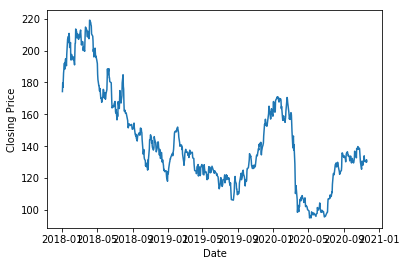

In [63]:
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.plot(indexedDataset)

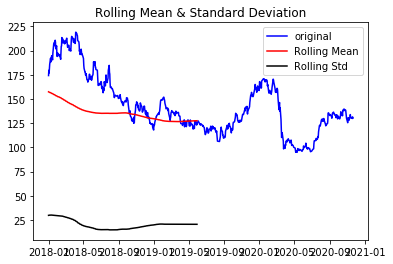

Results of dickey-fuller test
Test Statistics                 -1.254171
p-value                          0.649870
lags used                        1.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [64]:
#Determing rolling statistics
rolmean=indexedDataset.rolling(window=365).mean()
rolstd=indexedDataset.rolling(window=365).std()
#print(rolmean,rolstd)

#plot rolling statistics
orig=plt.plot(indexedDataset,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
print('Results of dickey-fuller test')
dftest=adfuller(indexedDataset['Closing Price'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)
                   

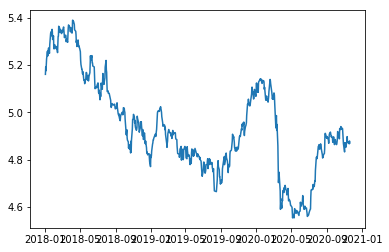

In [65]:
#Estimating Trend
indexedDataset_logScale=np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

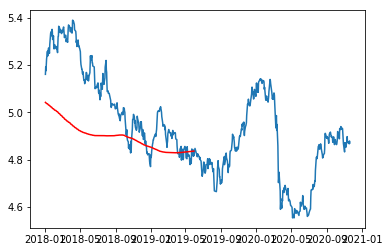

In [89]:
movingAverage=indexedDataset_logScale.rolling(window=365).mean()
movingSTD=indexedDataset_logScale.rolling(window=365).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')

In [90]:
datasetlogScaleMinusmovingAverage=indexedDataset_logScale-movingAverage
datasetlogScaleMinusmovingAverage.head(20)

#Removing Nan Values
datasetlogScaleMinusmovingAverage.dropna(inplace=True)
datasetlogScaleMinusmovingAverage.head(20)


,Closing Price
Daily,
2019-05-30,-0.019843
2019-05-29,-0.009334
2019-05-28,-0.021249
2019-05-27,0.006807
2019-05-24,0.002720
2019-05-23,0.009579
2019-05-22,-0.006790
2019-05-21,-0.051352
2019-05-20,-0.031140


In [97]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determining Rolling Statistics
    movingAverage=timeseries.rolling(window=365).mean().dropna(inplace=True)
    movingSTD=timeseries.rolling(window=365).std().dropna(inplace=True)
    
    #PLOT Rolling Statistics
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
    std=plt.plot(movingSTD,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test
    from statsmodels.tsa.stattools import adfuller
    print('Results of dickey-fuller test')
    dftest=adfuller(timeseries['Closing Price'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','lags used','number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)
    

ValueError: x, y, and format string must not be None

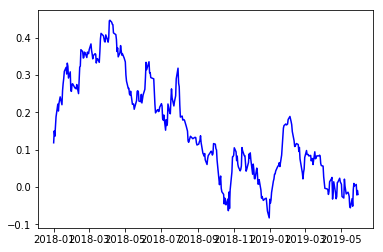

In [98]:
test_stationarity(datasetlogScaleMinusmovingAverage)

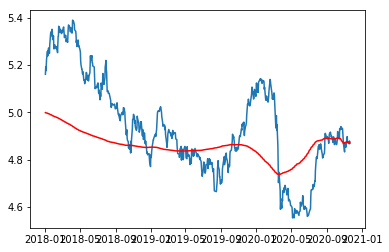

In [70]:
exponentialDecayWeightedAverage=indexedDataset_logScale.ewm(halflife=365,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

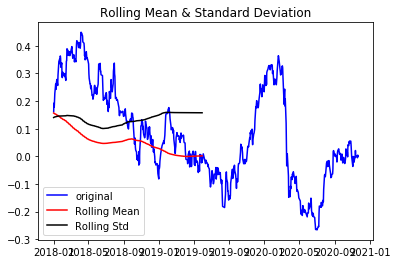

Results of dickey-fuller test
Test Statistics                 -1.743668
p-value                          0.408765
lags used                        1.000000
number of observations used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64


In [71]:
datasetlogScaleMinusmovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetlogScaleMinusmovingExponentialDecayAverage)